In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Epore the data

##### Displays top 5 rows in the dataset

In [8]:
df.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Displays dimensions of the dataset

In [9]:
df.shape

(768, 9)

#### We can see that there are 768 rows of data which means there are 768 samples or records in this data and 7 columns which means there are 7 features or data points for each fruit.

##### Displays column names in the dataset


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### Displays information about column attributes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### We can Continue exploring the data and get a count of all of the columns that contain empty (NaN, NAN, na) values

##### Count the empty values in each column

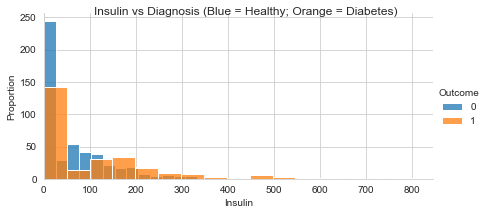

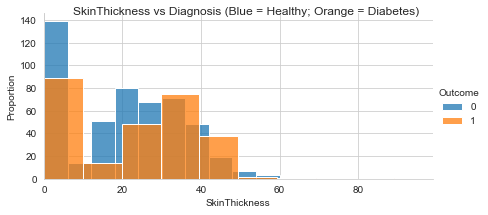

In [58]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(df,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(df,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

#### It would be a serious medical problem if a patient had an insulin level and skin thickness measurement of zero. As such, we can conclude that this dataset uses the number zero to represent missing or null data. Here we can see that as many as half of the rows contain columns with missing data.

#### Outcome is the column that we are going to predict with the help of other columns. Let us explore the different possible values in that column

In [40]:
dataset2 = df.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [41]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(((dataset2[:] == 0).sum())/768*100)

# of Rows, # of Columns:  (768, 8)

Column Name              % Null Values

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


Approximately 49% of the patients did not have their insulin levels measured. This causes me to be concerned that maybe the doctors only measured insulin levels in unhealthy looking patients or maybe they only measured insulin levels after having first made a preliminary diagnosis. If that were true then this would be a form of data leakage, and it would mean that our model would not generalize well to data collected from doctors who measure insulin levels for every patient.

### Check Data Leakage

In order to test this hypothesis I will check whether or not the Insulin and SkinThickness features are correlated with a diagnostic outcome (healthy/diabetic). What we find is that these features are not highly correlated with any given outcome -- and as such we can rule out our concern of data leakage.

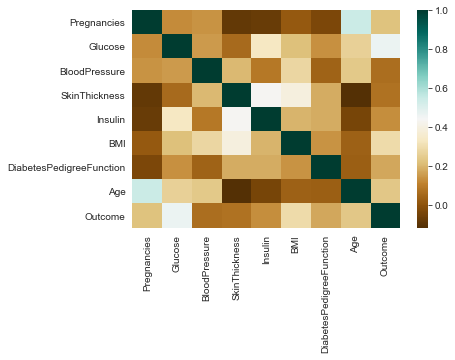

In [42]:
g = sns.heatmap(df.corr(),cmap="BrBG",annot=False)

In [44]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The Insulin and SkinThickness measurements are not highly correlated with any given outcome -- and as such we can rule out our concern of data leakage. The zero values in these categories are still erroneous, however, and therefore should not be included in our model. It is best to replace these values with some distribution of values near to the median measurement. Also note that it is best to impute these values after the train_test_split function in order to prevent yet another form of data leakage (i.e. the testing data should not be used when calculating the median value to use during imputation). The following histogram illustrates that the null values have indeed been replaced with median values.

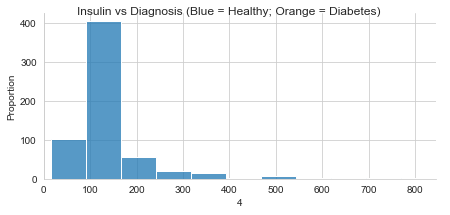

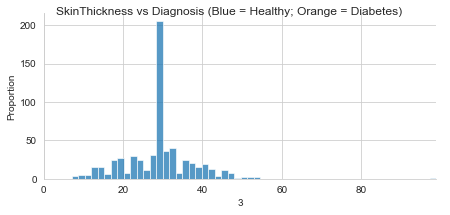

In [107]:
df = pd.read_csv("diabetes.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
imputer = SimpleImputer(missing_values=0,strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_test2 = imputer.transform(X_test)
X_train3 = pd.DataFrame(X_train2)
plotHistogram(X_train3,None,4,'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(X_train3,None,3,'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [108]:
y.shape

(768,)

#### Splitting the dataset

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3)

In [122]:
X_train.shape

(537, 8)

In [123]:
X_test.shape

(231, 8)

#### Feature Scaling

In [124]:
#Feature Scaling of data
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
x_train = ss.fit_transform (X_train)
x_test = ss.fit_transform (X_test)


In [113]:
x_train

array([[ 0.06287503, -0.05099665, -0.0867185 , ..., -0.3328065 ,
         0.67961434,  0.07876774],
       [ 1.24757289, -0.05099665,  0.84984131, ..., -0.48565414,
        -0.66359477, -0.92633984],
       [-0.82564837,  1.28714388,  0.1214059 , ...,  0.86449994,
         2.21087272, -0.00499122],
       ...,
       [ 1.24757289,  1.78505663,  0.1214059 , ...,  0.06204988,
         0.70946343,  0.24628567],
       [-0.23329944, -0.45555076, -0.3989051 , ..., -1.18620578,
         0.58708215, -0.84258087],
       [ 0.06287503, -0.82898533,  0.0173437 , ..., -0.01437394,
         0.39007815, -0.75882191]])

In [114]:
x_test

array([[ 0.60481979,  1.36176552, -0.29647434, ..., -0.90660172,
        -0.84772182,  1.44631909],
       [-0.59186862, -0.95894716,  1.13456748, ...,  0.25497661,
        -0.49233615,  0.73810561],
       [-0.29269652, -0.10060137,  0.3168293 , ..., -0.65408469,
        -1.06905851, -0.85537473],
       ...,
       [ 1.8015082 ,  0.09014213,  0.52126384, ..., -0.48994862,
         0.19349585,  1.00368567],
       [ 0.30564769,  1.48892786,  0.21461202, ..., -0.71721395,
         0.42730222,  1.53484578],
       [ 0.30564769, -3.78830919,  0.62348111, ...,  1.20191546,
        -0.32399557,  0.29547218]])

In [125]:
from sklearn import svm
svc = svm.SVC ()
#Loading the training data in the model
svc.fit (x_train,y_train)
print(y_train.shape)

(537,)


In [126]:
# #Predicting output with test data
# array=[6,148,72,35,0,33.6,0.627,50]
# arr = np.array(array)

# y_pred = svc.predict(arr.reshape(1, -1))
# y_pred

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

svc = svm.SVC ()
#Loading the training data in the model
svc.fit (x_train,y_train)

# Predicting the output with test data
y_pred=svc.predict (X_test.values)
# print (y_pred)
#Calculating the accuracy of the predicted outcome
#print (accuracy_score (Y_test,y_pred))
input_data =[]
Pregnancies=int(input("Enter Pregnancies:"))
input_data.append(Pregnancies)
Glucose=int(input("Enter Glucose:"))
input_data.append(Glucose)
BloodPressure=int(input("Enter BloodPressure:"))
input_data.append(BloodPressure)
SkinThickness=int(input("Enter Skin Thickness:"))
input_data.append(SkinThickness)
Insulin=int(input("Enter Insulin:"))
input_data.append(Insulin)
BMI=float(input("Enter BMI:"))
input_data.append(BMI)
DiabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction:"))
input_data.append(DiabetesPedigreeFunction)
Age=int(input("Enter Age:"))
input_data.append(Age)
##############Predictive System##################################


# for i in range(13):
#     user_inp = [float(number) if '.' in number else int(number) for number in input("Enter Number: ").replace(',', ' ').split()]


# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if (prediction[0]== 0):  
    print ('The Person Does not have diabetes')
else:  
    print ('The Person has diabetes')
    

Enter Pregnancies: 9
Enter Glucose: 171
Enter BloodPressure: 110
Enter Skin Thickness: 24
Enter Insulin: 240
Enter BMI: 45.4
Enter DiabetesPedigreeFunction: 0.721
Enter Age: 54


[1]
The Person has diabetes


#### Accuracy score

In [137]:
#Accuracy Score of Support vector classifier
from sklearn.metrics import accuracy_score
print(" Accuracy Score of Support vector classifier: ")
print (accuracy_score (y_test,y_pred))

 Accuracy Score of Support vector classifier: 
0.658008658008658


### Logistic Regression

In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', max_iter=1000)
#Loading the training data in the model
model.fit (x_train,y_train)

# Predicting the output with test data
y_pred=model.predict (X_test.values)
# print (y_pred)
#Calculating the accuracy of the predicted outcome
#print (accuracy_score (Y_test,y_pred))
input_data =[]
Pregnancies=int(input("Enter Pregnancies:"))
input_data.append(Pregnancies)
Glucose=int(input("Enter Glucose:"))
input_data.append(Glucose)
BloodPressure=int(input("Enter BloodPressure:"))
input_data.append(BloodPressure)
SkinThickness=int(input("Enter Skin Thickness:"))
input_data.append(SkinThickness)
Insulin=int(input("Enter Insulin:"))
input_data.append(Insulin)
BMI=float(input("Enter BMI:"))
input_data.append(BMI)
DiabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction:"))
input_data.append(DiabetesPedigreeFunction)
Age=int(input("Enter Age:"))
input_data.append(Age)
##############Predictive System##################################


# for i in range(13):
#     user_inp = [float(number) if '.' in number else int(number) for number in input("Enter Number: ").replace(',', ' ').split()]


# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if (prediction[0]== 0):  
    print ('The Person Does not have diabetes')
else:  
    print ('The Person has diabetes')

Enter Pregnancies: 9
Enter Glucose: 171
Enter BloodPressure: 124
Enter Skin Thickness: 24
Enter Insulin: 240
Enter BMI: 45.4
Enter DiabetesPedigreeFunction: 0.721
Enter Age: 21


[1]
The Person has diabetes


In [151]:
#Accuracy Score of Support vector classifier
from sklearn.metrics import accuracy_score
print(" Accuracy Score of Logistic Regression classifier: ")
print (accuracy_score (y_test,y_pred))

 Accuracy Score of Logistic Regression classifier: 
0.3463203463203463


In [146]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit (x_train,y_train)
y_pred=clf.predict (X_test.values)
# print (y_pred)
#Calculating the accuracy of the predicted outcome
#print (accuracy_score (Y_test,y_pred))
input_data =[]
Pregnancies=int(input("Enter Pregnancies:"))
input_data.append(Pregnancies)
Glucose=int(input("Enter Glucose:"))
input_data.append(Glucose)
BloodPressure=int(input("Enter BloodPressure:"))
input_data.append(BloodPressure)
SkinThickness=int(input("Enter Skin Thickness:"))
input_data.append(SkinThickness)
Insulin=int(input("Enter Insulin:"))
input_data.append(Insulin)
BMI=float(input("Enter BMI:"))
input_data.append(BMI)
DiabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction:"))
input_data.append(DiabetesPedigreeFunction)
Age=int(input("Enter Age:"))
input_data.append(Age)
##############Predictive System##################################


# for i in range(13):
#     user_inp = [float(number) if '.' in number else int(number) for number in input("Enter Number: ").replace(',', ' ').split()]


# Change the input data to a numpy array
numpy_data= np.asarray (input_data)
# reshape the numpy array as we are predicting for only on instance
input_reshaped = numpy_data.reshape (1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
if (prediction[0]== 0):  
    print ('The Person Does not have diabetes')
else:  
    print ('The Person has diabetes')

Enter Pregnancies: 9
Enter Glucose: 171
Enter BloodPressure: 110
Enter Skin Thickness: 24
Enter Insulin: 240
Enter BMI: 45.4
Enter DiabetesPedigreeFunction: 0.721
Enter Age: 54


[1]
The Person has diabetes


In [148]:
#Accuracy Score of Support vector classifier
from sklearn.metrics import accuracy_score
print(" Accuracy Score of DecisionTree classifier: ")
print (accuracy_score (y_test,y_pred))

 Accuracy Score of DecisionTree classifier: 
0.5151515151515151
